In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("MountainCar-v0")

In [4]:
def main_loop(learning_rate=0.1, epsilon=0.5, episodes=5000, show_every=1000, discount=0.95):
    LEARNING_RATE = learning_rate

    DISCOUNT = discount
    EPISODES = episodes


    DISCRETE_OS_SIZE = [20, 20]
    discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE
    SHOW_EVERY = show_every

    epsilon = epsilon #una medida de que tanto va  a explorar el agente
    START_EPSILON_DECAYING = 1
    END_EPSILON_DECAYING = EPISODES // 2
    epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

    q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE+[env.action_space.n])) #se inicializa con valores aleatorios

    ep_rewards = list()
    aggr_ep_rewards = {"ep": [],
                     "avg" : [],
                     "min": [],
                     "max": []}

    def get_discrete_state(state):
        discrete_state = (state - env.observation_space.low) / discrete_os_win_size
        return tuple(discrete_state.astype(np.int))

    for episode in range(EPISODES):
        episode_reward = 0
        if episode%SHOW_EVERY == 0:
            print(episode)
            render = False
        else:
            render = False

        discrete_state = get_discrete_state(env.reset())
        done = False
        while not done:

            if np.random.random() > epsilon:
                action = np.argmax(q_table[discrete_state])
            else:
                action = np.random.randint(0, env.action_space.n)

            new_state, reward, done, _ = env.step(action)
            episode_reward += reward
            new_discrete_state = get_discrete_state(new_state)
            if render:
                env.render()

            if not done:
                max_future_q = np.max(q_table[new_discrete_state]) #busca la accion con mas valor para el nuevo estado
                current_q = q_table[discrete_state + (action, )] #busca la accion con mas valor para el estado anterior

                new_q = (1-LEARNING_RATE)*current_q + LEARNING_RATE* (reward+DISCOUNT*max_future_q) #calcula el nuevo valor
                #en la tabla, no lo reemplaza, sino que pondera el current_q
                q_table[discrete_state+(action, )] = new_q

            elif new_state[0] >= env.goal_position:
                #print(f"we made it on {episode}")
                q_table[discrete_state + (action, )] = 0

            discrete_state = new_discrete_state

        if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
            epsilon -= epsilon_decay_value

        ep_rewards.append(episode_reward)

        if not episode % SHOW_EVERY:
            average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
            aggr_ep_rewards["ep"].append(episode)
            aggr_ep_rewards["avg"].append(average_reward)
            aggr_ep_rewards["min"].append(min(ep_rewards[-SHOW_EVERY:]))
            aggr_ep_rewards["max"].append(max(ep_rewards[-SHOW_EVERY:]))

            print(f"Episode: {episode} avg: {average_reward} min: {min(ep_rewards[-SHOW_EVERY:])} max: {max(ep_rewards[-SHOW_EVERY:])}")



    env.close()

    plt.plot(aggr_ep_rewards["ep"], aggr_ep_rewards["avg"], label="Average", color="blue")
    plt.plot(aggr_ep_rewards["ep"], aggr_ep_rewards["min"], label="Minimum", color="red")
    plt.plot(aggr_ep_rewards["ep"], aggr_ep_rewards["max"], label="Maximum", color="green")
    plt.legend(loc=4)
    plt.show()
    #SEGUIR ACA: https://youtu.be/Gq1Azv_B4-4?list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7&t=779

0
Episode: 0 avg: -200.0 min: -200.0 max: -200.0
1000
Episode: 1000 avg: -199.889 min: -200.0 max: -168.0
2000
Episode: 2000 avg: -194.757 min: -200.0 max: -149.0
3000
Episode: 3000 avg: -176.847 min: -200.0 max: -124.0
4000
Episode: 4000 avg: -176.333 min: -200.0 max: -122.0


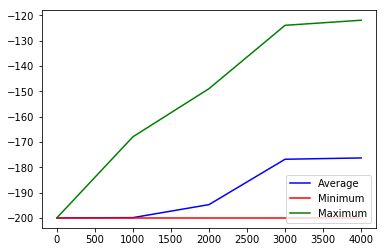

In [5]:
main_loop()

0
Episode: 0 avg: -200.0 min: -200.0 max: -200.0
2000
Episode: 2000 avg: -199.948 min: -200.0 max: -167.0
4000
Episode: 4000 avg: -192.6295 min: -200.0 max: -123.0
6000
Episode: 6000 avg: -179.3165 min: -200.0 max: -119.0
8000
Episode: 8000 avg: -157.562 min: -200.0 max: -115.0


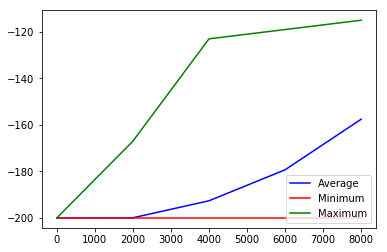

In [6]:
main_loop(episodes=10000, show_every=2000, epsilon=0.7)

Se ve como el average_reward va subiendo a medida que el agente alcanza el objetivo mas seguido
Aumentando el epsilon y iterando por mas episodios, llega a un avg reward mas alto